In [1]:
import numpy as np
import LatticeDefinitions as ld
import GeometryFunctions as gf
import GeneralLattice as gl
import LAMMPSDump as LD
import matplotlib.pyplot as plt
import pandas as pd

In [49]:
##File format Tripleline ID, Tripleline Centre, TJ Energy, Radius, TJ Atoms
##GBEnergy, GBAtoms
strDirectory = '/home/paul/csf3_scratch/TripleLines/data'
lstE = []

In [57]:
lstE = []
lstN = []
lstR = []
for j in range(1,21):
    strFileName = strDirectory + str(j) + '/summary.data' + str(j)
    lstE.extend(np.loadtxt(strFileName,usecols=2, delimiter= ','))
    lstN.extend(np.loadtxt(strFileName,usecols=5, delimiter= ','))
    lstR.extend(np.loadtxt(strFileName,usecols=3, delimiter= ','))
np.argmax(lstR)

37

In [51]:
lstMeanE = []
for j in range(len(lstE)):
    if lstN[j] !=0:
        lstMeanE.append(lstE[j]-lstN[j]) 
np.argmax(lstR)
81/6

13.5

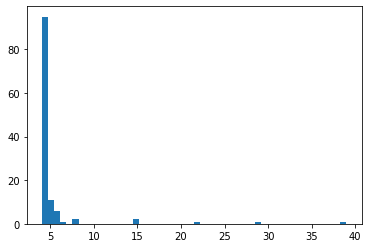

In [55]:
plt.hist(lstR,bins =50);

In [14]:
lstR =[]
for j in range(1,7):
    strFileName = strDirectory + str(j) + '/SummaryData' + str(j)
    lstR.extend(np.loadtxt(strFileName, usecols=-2))
    if np.min(lstR) < -500:
        print(j)

In [45]:
np.argmax(lstR)

39

In [12]:
140/13

11.666666666666666